In [32]:
from src.models import Simulation, Strategy, Game
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
class BenoulliProcess(Game):
    def __init__(self, title: str = "Bernoulli Process", p: float = 0.5):
        super().__init__(title)
        self.p = p

    def play_round(self, game_history):
        return 1 if np.random.rand() < self.p else -1
    
class FixedBettingStrategy(Strategy):
    def __init__(self,bet_amount: float, name: str = "Fixed Bet Strategy"):
        super().__init__(name)
        self.bet_amount = bet_amount

    def decide_bet(self, game_history):
        return self.bet_amount
    
class DoubleOnLossStrategy(Strategy):
    def __init__(self, base_bet: float, name: str = "Double On Loss Strategy"):
        super().__init__(name)
        self.base_bet = base_bet
        self.current_bet = base_bet

    def decide_bet(self, game_history):
        last = game_history.last_record()
        print("Last game record:", last)
        if not game_history.is_empty() and last["outcome"] == -1:
            self.current_bet *= 2
        else:
            self.current_bet = self.base_bet
        return self.current_bet
    
sim = Simulation(
    game=BenoulliProcess(p=0.5),
    strategies=[
        FixedBettingStrategy(bet_amount=100),
        DoubleOnLossStrategy(base_bet=50)
    ],
    max_bet=1000000,
    start_value=1000
)

results = sim.run(rounds=1000)

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


Last game record: Series([], dtype: object)
Last game record: outcome          1.0
bet             50.0
total_gain    1050.0
Name: 0, dtype: float64
Last game record: outcome          1.0
bet             50.0
total_gain    1100.0
Name: 1, dtype: float64
Last game record: outcome         -1.0
bet             50.0
total_gain    1050.0
Name: 2, dtype: float64
Last game record: outcome        -1.0
bet           100.0
total_gain    950.0
Name: 3, dtype: float64
Last game record: outcome        -1.0
bet           200.0
total_gain    750.0
Name: 4, dtype: float64
Last game record: outcome        -1.0
bet           400.0
total_gain    350.0
Name: 5, dtype: float64
Last game record: outcome        -1.0
bet           800.0
total_gain   -450.0
Name: 6, dtype: float64
Last game record: outcome         -1.0
bet           1600.0
total_gain   -2050.0
Name: 7, dtype: float64
Last game record: outcome         -1.0
bet           3200.0
total_gain   -5250.0
Name: 8, dtype: float64
Last game record: outco

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


In [34]:
results["Fixed Bet Strategy"].compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(5400.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(1800.0)}

In [35]:
result1 = results["Fixed Bet Strategy"]
result2 = results["Double On Loss Strategy"]

In [36]:
result1.history.describe()

,outcome,bet,total_gain
count,1000.000000,1000.0,1000.000000
mean,0.044000,100.0,2333.000000
std,0.999531,0.0,1732.718475
min,-1.000000,100.0,-500.000000
25%,-1.000000,100.0,700.000000
50%,1.000000,100.0,2500.000000
75%,1.000000,100.0,3900.000000
max,1.000000,100.0,5700.000000


In [37]:
result1.compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(5400.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(1800.0)}

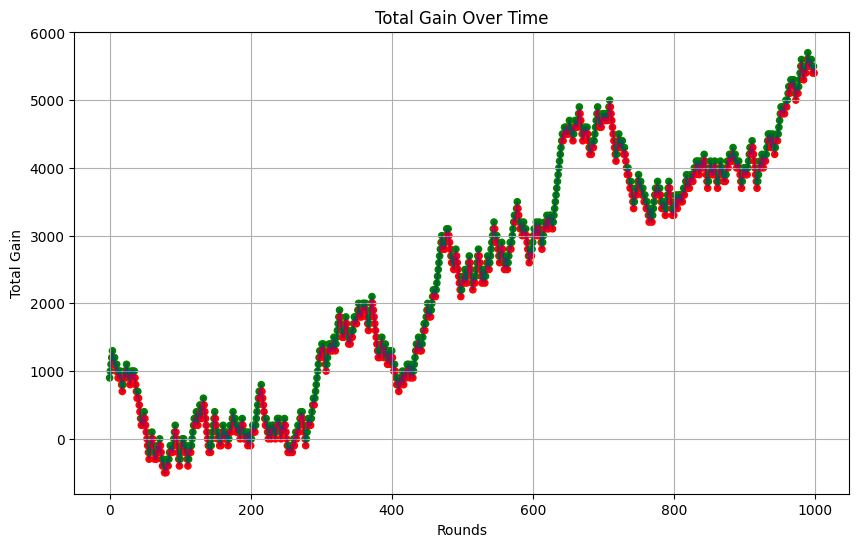

In [38]:
result1.plot_gain_over_time()

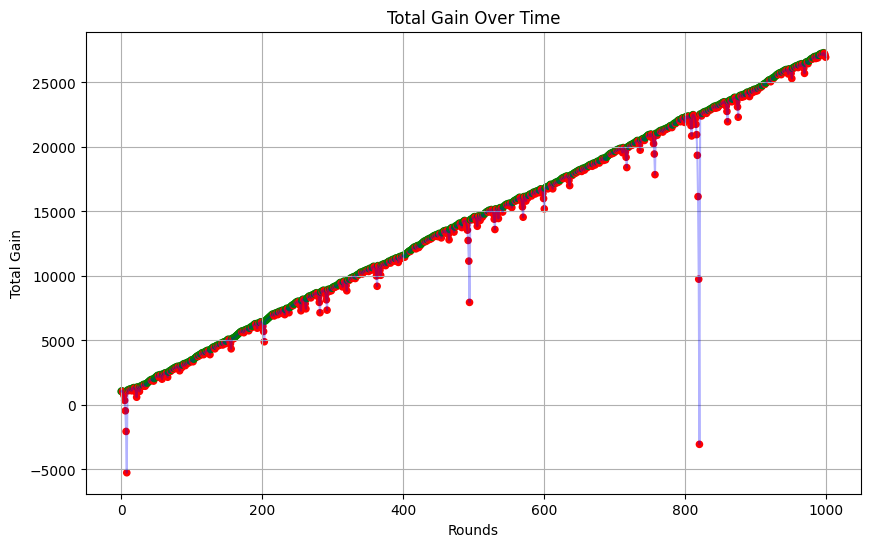

In [39]:
result2.plot_gain_over_time()

In [61]:
class RandomWalkGame(Game):
    def __init__(self, a, b, p=0.5, title="Random Walk Game"):
        super().__init__(title)
        self.a = a
        self.b = b
        self.p = p
        self.position = 0
        self.step_list = []

    def play_round(self, game_history):
        r = np.random.rand()
        
        step = 1 if r < self.p else -1
        self.step_list.append(step)
        self.position += step

        # Win if inside [a, b]
        if self.a <= self.position <= self.b:
            return 1
        else:
            return -1
        
random_walk_game = RandomWalkGame(a=-5, b=5, p=0.5)
sim_rw = Simulation(
    game=random_walk_game,
    strategies=[
        FixedBettingStrategy(bet_amount=100),
        #DoubleOnLossStrategy(base_bet=50)
    ],
    max_bet=1000000,
    start_value=1000
)

In [62]:
results_rw = sim_rw.run(rounds=5000)

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


In [64]:
results_rw_1 = results_rw["Fixed Bet Strategy"]
#esults_rw_2 = results_rw["Double On Loss Strategy"]

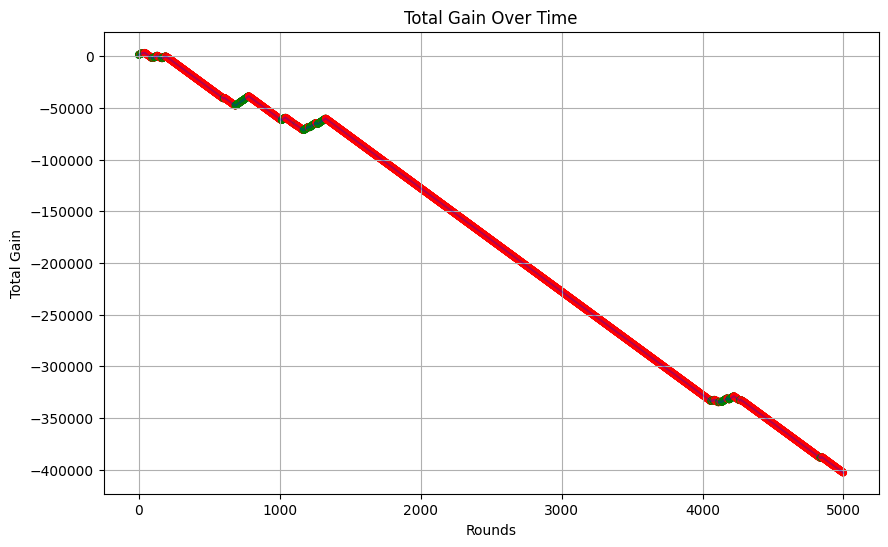

In [65]:
results_rw_1.plot_gain_over_time()

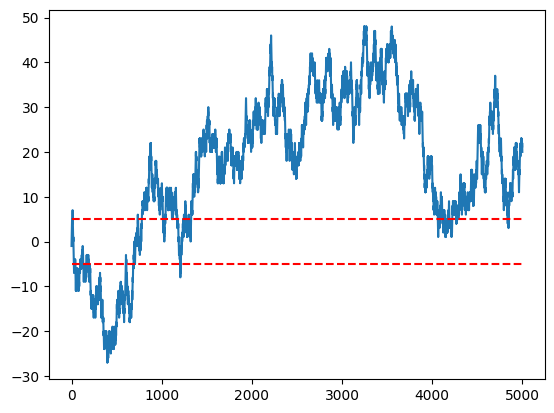

In [66]:
step_list_np = np.array(random_walk_game.step_list)

plt.plot(np.cumsum(step_list_np))
plt.hlines(5, 0, len(step_list_np), colors='r', linestyles='dashed')
plt.hlines(-5, 0, len(step_list_np), colors='r', linestyles='dashed')